<a href="https://colab.research.google.com/github/shreyadeep01/DATA240_Project/blob/initial-colab-change-files-_sh/DATA240_project_w_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


Load datasets from Google drives

In [ ]:
is_churn_url = 'https://drive.google.com/file/d/1P43072y7KI4RUOKgWzZc3ov8kMaFQMVA/view?usp=sharing'
is_churn_url = 'https://drive.google.com/uc?id=' + is_churn_url.split('/')[-2]

# is_churn_url = 'is_churn.csv'
is_churn_df = pd.read_csv(is_churn_url)

# print(is_churn_df)

In [ ]:
transactions_url = 'https://drive.google.com/file/d/1oPbL4uWPtFvq41IqNfMNW7QUaGA3INXV/view?usp=sharing'
transactions_url = 'https://drive.google.com/uc?id=' + transactions_url.split('/')[-2]
# transactions_url = 'transactions.csv'
transactions_df = pd.read_csv(transactions_url)

# print(transactions_df)

In [ ]:
user_logs_url = 'https://drive.google.com/file/d/1FNMohIsfIcBFs2V-0m43qYoIGP1gCLQe/view?usp=sharing'
user_logs_url = 'https://drive.google.com/uc?id=' + user_logs_url.split('/')[-2]

user_logs_df = pd.read_csv(user_logs_url)

# print(user_logs_df)

In [ ]:
members_url = 'https://drive.google.com/file/d/1yWY0mrpyEU3Ug98H8JsbQ-esROu5L5X6/view?usp=sharing'
members_url = 'https://drive.google.com/uc?id=' + members_url.split('/')[-2]

# members_path = 'members.csv'
members_df = pd.read_csv(members_url)

# print(members_df)

Merge four datasets into a large dataset

In [ ]:
# count the average playtime per day for every member

avg_playtime = user_logs_df.groupby('msno', as_index=False)['total_secs'].mean()
avg_playtime = avg_playtime.rename(columns={"total_secs": "playtime_per_day"})
print(avg_playtime.min())

msno                ++LEgyw4z5zuPu61SoBhMicDimkV+A9kPbcMaQgC/7c=
playtime_per_day                            -320255973495365.125
dtype: object


In [ ]:
# calculate the total length of membership plan in days

membership_days = transactions_df.groupby('msno', as_index=False)['payment_plan_days'].sum()
latest_transaction_date = transactions_df.groupby('msno', as_index=False)['transaction_date'].max()
latest_transactions = transactions_df.merge(latest_transaction_date, on=["msno", "transaction_date"])
# print(latest_transactions)

In [ ]:
# merge all dataset

merged_data = is_churn_df.merge(avg_playtime, how='inner', on=["msno"]).merge(members_df, how='inner', on="msno").merge(latest_transactions, how='inner', on=["msno"])

print(merged_data)

                                              msno  is_churn  \
0     dEPT6Ki6RIimMvKFy2B/iLhNalAIQVvVEznJwqcI5xg=         0   
1     NZh6JkdKxv5+yzfxoJjDpqQqlxaWoLte6GoAUcD2RKs=         0   
2     MQJh0JzTYfSzdsOH/ice1rsxouzE/dRDFeI4MhA3mqA=         0   
3     TMBsL0a7IjM8dEC4Yg8lwbnZP52MJpiSLcvHNjesmSs=         0   
4     QH6WsEFO0cDNqAgBzuFoKdPbpaq27+StO4I/6ATGfXc=         0   
...                                            ...       ...   
4423  R+puA1IoFN9ZIBZINnLZivZEAW8jv47H6D0zPNeGlGc=         1   
4424  uDT8cz06dz2Hwv0DspKzjDPcP4izsPH6HZgd9EvEgGg=         1   
4425  2tfPyhPXlIGjqGMb+r/ZTmxeG/v0i28xY3xSn97gdOo=         1   
4426  TQvFyIQAcPI4qpzYoT9+b9dM9Odjnyw4ev3kOu1I5sI=         1   
4427  TQvFyIQAcPI4qpzYoT9+b9dM9Odjnyw4ev3kOu1I5sI=         1   

      playtime_per_day  city  bd  gender  registered_via  \
0         1.481261e+04    22  35    male               9   
1         1.446139e+03     1   0     NaN               7   
2         3.540335e+03     8  32  female           

In [ ]:
# check missing values

merged_data.isna().sum(axis = 0)

msno                         0
is_churn                     0
playtime_per_day             0
city                         0
bd                           0
gender                    2471
registered_via               0
registration_init_time       0
payment_method_id            0
payment_plan_days            0
plan_list_price              0
actual_amount_paid           0
is_auto_renew                0
transaction_date             0
membership_expire_date       0
is_cancel                    0
dtype: int64

In [ ]:
# Replace missing values in column 'gender' with integer -1

merged_data[['gender']] = merged_data[['gender']].fillna('-1')

In [ ]:
# Convert registration_init_time, transaction_date, membership_expire_date to years

merged_data['registration_init_time'] = merged_data['registration_init_time'].astype(str).str[:4]
merged_data['transaction_date'] = merged_data['transaction_date'].astype(str).str[:4]
merged_data['membership_expire_date'] = merged_data['membership_expire_date'].astype(str).str[:4]

print(merged_data)

                                              msno  is_churn  \
0     dEPT6Ki6RIimMvKFy2B/iLhNalAIQVvVEznJwqcI5xg=         0   
1     NZh6JkdKxv5+yzfxoJjDpqQqlxaWoLte6GoAUcD2RKs=         0   
2     MQJh0JzTYfSzdsOH/ice1rsxouzE/dRDFeI4MhA3mqA=         0   
3     TMBsL0a7IjM8dEC4Yg8lwbnZP52MJpiSLcvHNjesmSs=         0   
4     QH6WsEFO0cDNqAgBzuFoKdPbpaq27+StO4I/6ATGfXc=         0   
...                                            ...       ...   
4423  R+puA1IoFN9ZIBZINnLZivZEAW8jv47H6D0zPNeGlGc=         1   
4424  uDT8cz06dz2Hwv0DspKzjDPcP4izsPH6HZgd9EvEgGg=         1   
4425  2tfPyhPXlIGjqGMb+r/ZTmxeG/v0i28xY3xSn97gdOo=         1   
4426  TQvFyIQAcPI4qpzYoT9+b9dM9Odjnyw4ev3kOu1I5sI=         1   
4427  TQvFyIQAcPI4qpzYoT9+b9dM9Odjnyw4ev3kOu1I5sI=         1   

      playtime_per_day  city  bd  gender  registered_via  \
0         1.481261e+04    22  35    male               9   
1         1.446139e+03     1   0      -1               7   
2         3.540335e+03     8  32  female           

In [ ]:
# replacing values in column gender
merged_data['gender'].replace(['female', 'male'],
                        [0, 1], inplace=True)

In [ ]:
merged_data.dtypes

msno                       object
is_churn                    int64
playtime_per_day          float64
city                        int64
bd                          int64
gender                     object
registered_via              int64
registration_init_time     object
payment_method_id           int64
payment_plan_days           int64
plan_list_price             int64
actual_amount_paid          int64
is_auto_renew               int64
transaction_date           object
membership_expire_date     object
is_cancel                   int64
dtype: object

In [ ]:
# set row names (index) to the msno column

merged_data = merged_data.set_index('msno')

print(merged_data)

                                              is_churn  playtime_per_day  \
msno                                                                       
dEPT6Ki6RIimMvKFy2B/iLhNalAIQVvVEznJwqcI5xg=         0      1.481261e+04   
NZh6JkdKxv5+yzfxoJjDpqQqlxaWoLte6GoAUcD2RKs=         0      1.446139e+03   
MQJh0JzTYfSzdsOH/ice1rsxouzE/dRDFeI4MhA3mqA=         0      3.540335e+03   
TMBsL0a7IjM8dEC4Yg8lwbnZP52MJpiSLcvHNjesmSs=         0      2.101799e+03   
QH6WsEFO0cDNqAgBzuFoKdPbpaq27+StO4I/6ATGfXc=         0      2.693799e+04   
...                                                ...               ...   
R+puA1IoFN9ZIBZINnLZivZEAW8jv47H6D0zPNeGlGc=         1     -4.303284e+13   
uDT8cz06dz2Hwv0DspKzjDPcP4izsPH6HZgd9EvEgGg=         1      6.345836e+03   
2tfPyhPXlIGjqGMb+r/ZTmxeG/v0i28xY3xSn97gdOo=         1      6.386885e+03   
TQvFyIQAcPI4qpzYoT9+b9dM9Odjnyw4ev3kOu1I5sI=         1      6.546864e+03   
TQvFyIQAcPI4qpzYoT9+b9dM9Odjnyw4ev3kOu1I5sI=         1      6.546864e+03   

           

Split training and test data

In [ ]:
# Identify features and target variable
X = merged_data.drop(['is_churn'], axis=1)
y = merged_data['is_churn']

yes_count = merged_data['is_churn'].value_counts().get(1, 0)
no_count = merged_data['is_churn'].value_counts().get(0, 0)
print(yes_count)
print(no_count)

306
4122


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Combine X_train and y_train into a single DataFrame for undersampling
train_data = pd.concat([X_train, y_train], axis=1)

# Identify the minority class label
minority_class_label = train_data['is_churn'].value_counts().idxmin()

# Apply random undersampling on imbalanced target data
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(train_data.drop('is_churn', axis=1), train_data['is_churn'])
print(X_resampled)

     playtime_per_day  city  bd gender  registered_via registration_init_time  \
0         3054.982949     1   0     -1               7                   2016   
1        21048.954481     8   0     -1               9                   2015   
2         4645.567653     4  32      1               9                   2010   
3         3618.238833     1   0     -1               7                   2014   
4         3619.656167     4  25      0               3                   2012   
..                ...   ...  ..    ...             ...                    ...   
485       6345.836411    17  17      0               7                   2016   
486       4254.758122     1   0     -1               7                   2011   
487       7506.612632    22  33      1               9                   2011   
488       4441.723980     5  41      1               9                   2009   
489       4729.417708     1   0     -1               3                   2013   

     payment_method_id  pay

Train and evaluate classification models (RANDOM FOREST AS AN EXAMPLE)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF = RandomForestClassifier(n_estimators=10, random_state=0)
RF.fit(X_resampled, y_resampled)

y_pred_RF = RF.predict(X_test)

accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(f'Accuracy for Random Forest Classifier with 10 Estimators: {accuracy_RF:.4f}')

Accuracy for Random Forest Classifier with 10 Estimators: 0.8916


EDA

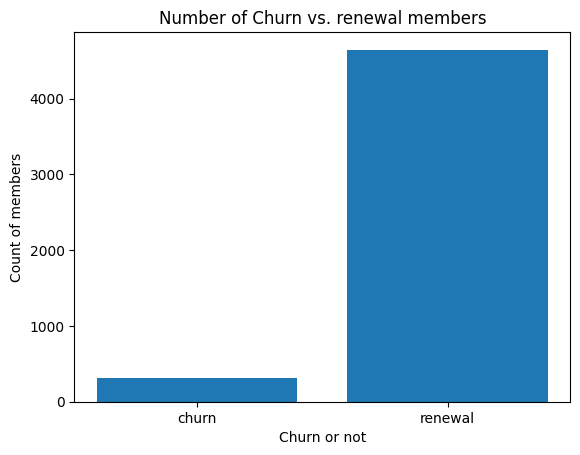

In [ ]:
# bar plot for number of churn

count_churn = len(is_churn_df[(is_churn_df['is_churn'] == 1)])
count_renewal = len(is_churn_df[(is_churn_df['is_churn'] == 0)])

x = ['churn', 'renewal']
y = [count_churn, count_renewal]

plt.bar(x, y)

plt.xlabel("Churn or not")
plt.ylabel("Count of members")
plt.title("Number of Churn vs. renewal members")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
def plot_model_results(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(12, 5))

    # Plotting Confusion Matrix
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Plotting Accuracy Score
    plt.subplot(1, 2, 2)
    plt.bar(model_name, acc)
    plt.title(f'Accuracy Score for {model_name}')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Creating the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Fitting the classifier to the resampled training data
dt.fit(X_resampled, y_resampled)

# Making predictions
y_pred_dt = dt.predict(X_test)

# Calculating accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy for Decision Tree Classifier: {accuracy_dt:.4f}')


Accuracy for Decision Tree Classifier: 0.8781


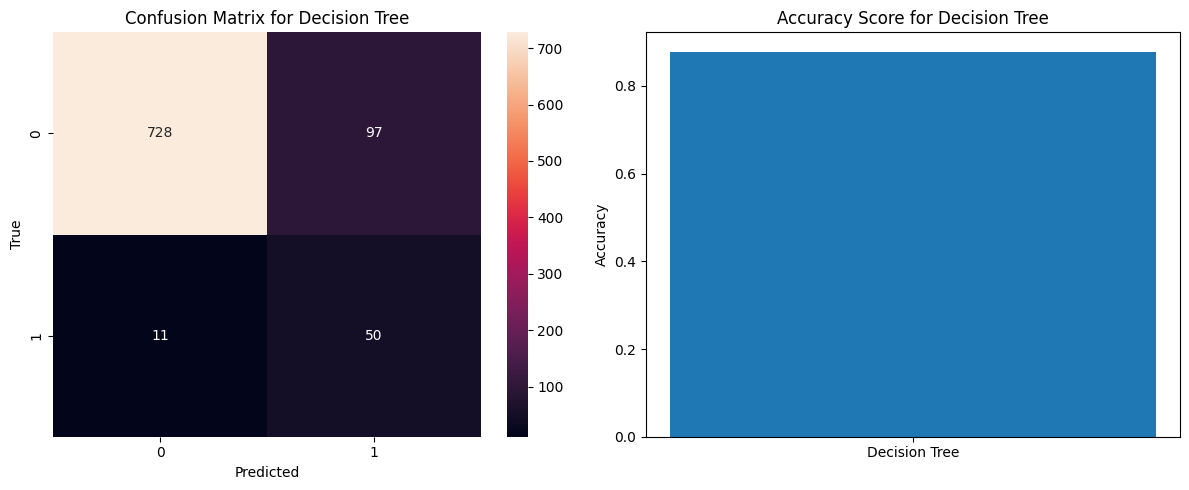

In [ ]:
# For Decision Tree
plot_model_results(dt, X_test, y_test, 'Decision Tree')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Creating the AdaBoost classifier
ab = AdaBoostClassifier(random_state=42)

# Fitting the classifier to the resampled training data
ab.fit(X_resampled, y_resampled)

# Making predictions
y_pred_ab = ab.predict(X_test)

# Calculating accuracy
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print(f'Accuracy for AdaBoost Classifier: {accuracy_ab:.4f}')


Accuracy for AdaBoost Classifier: 0.9018


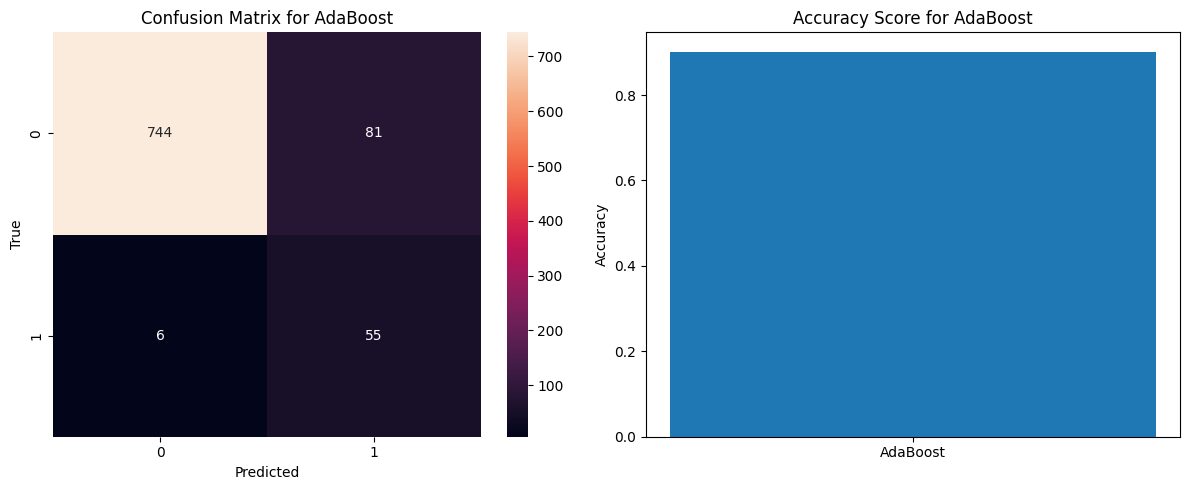

In [ ]:

# For AdaBoost
plot_model_results(ab, X_test, y_test, 'AdaBoost')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Creating the KNN classifier
knn = KNeighborsClassifier()

# Fitting the classifier to the resampled training data
knn.fit(X_resampled, y_resampled)

# Making predictions
y_pred_knn = knn.predict(X_test)

# Calculating accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy for KNN Classifier: {accuracy_knn:.4f}')


Accuracy for KNN Classifier: 0.6038


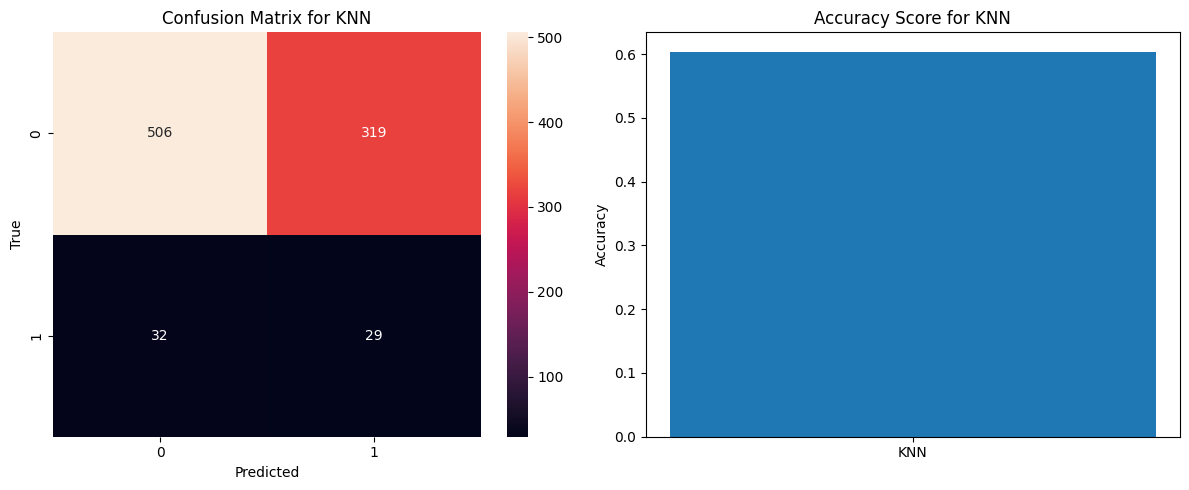

In [ ]:
# For KNN
plot_model_results(knn, X_test, y_test, 'KNN')

In [ ]:
import xgboost as xgb

# Creating the XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42)

# Fitting the classifier to the resampled training data
xgb_clf.fit(X_resampled, y_resampled)

# Making predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Calculating accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy for XGBoost Classifier: {accuracy_xgb:.4f}')


ValueError: ignored